<a href="https://colab.research.google.com/github/saeedt70/persian-text-classification-/blob/main/use_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl
!pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 316 kB 4.9 MB/s 
     |████████████████████████████████| 1.4 MB 24.1 MB/s 
     |████████████████████████████████| 233 kB 44.2 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394487 sha256=1b67979135abad986fd1224c52efed9a8ada04ab803a4b13522fcb2b22601401
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154183 sha256=80ddb3a6923eaf553647db21d59a72acf5631c67125ecda92e921887efe99ea3
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 

In [ ]:
import numpy as np 
import pandas as pd
from hazm import *
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Saeed taheri.xlsx')
df.shape

(21087, 3)

text    19
cat      2
sent     3
dtype: int64


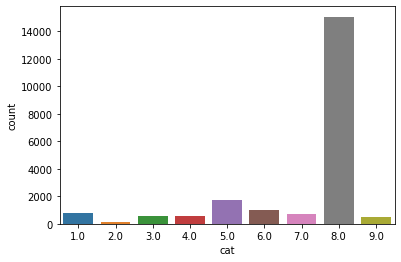

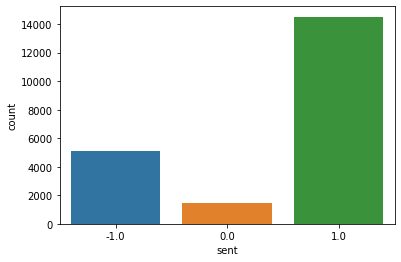

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


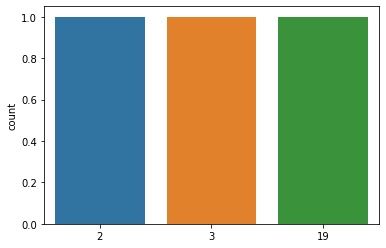

In [ ]:
isni=df.isnull().sum()
print(isni)
sns.countplot(x=df["cat"])
plt.show()

sns.countplot(x=df["sent"])
plt.show()
#isnull
sns.countplot(isni)
plt.show()

In [ ]:
import re

normalizer = Normalizer()
df = df.dropna()
df['text'] = df['text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

df['text'] = df['text'].apply(lambda x:normalizer.normalize(x))

df['text'] = df['text'].apply(lambda x: re.sub('[0-9]+', ' ', x))


To_Process = df[['sent','text']]
To_Process.shape


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


(21049, 2)

In [ ]:
train, test = train_test_split(To_Process, test_size=0.2)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Define the sequence lengths, max number of words and embedding dimensions
MAX_SEQUENCE_LENGTH = 300 #can plot a graph for length
MAX_NB_WORDS = 15000
EMBEDDING_DIM = 100

# Get the frequently occurring words
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train.text)
train_sequences = tokenizer.texts_to_sequences(train.text)
test_sequences = tokenizer.texts_to_sequences(test.text)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

#some padding shit
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

Found 11377 unique tokens.


In [ ]:
from sklearn.preprocessing import LabelEncoder

train_labels = train['sent']
test_labels = test['sent']

le = LabelEncoder()
le.fit(train_labels)
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)
print(le.classes_)

[-1.  0.  1.]


In [ ]:
from tensorflow.keras.utils import to_categorical

#change data types (actualy idk why)
labels_train = to_categorical(np.asarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))

In [ ]:
import pandas as pd
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import classification_report
newmodel=load_model('/content/drive/MyDrive/mymodel')
newmodel.summary()
newmodel.get_weights()
newmodel.optimizer







Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 300, 100)          1500000   
                                                                 
 lstm_7 (LSTM)               (None, 300, 16)           7488      
                                                                 
 dropout_7 (Dropout)         (None, 300, 16)           0         
                                                                 
 batch_normalization_7 (Batc  (None, 300, 16)          64        
 hNormalization)                                                 
                                                                 
 flatten_7 (Flatten)         (None, 4800)              0         
                                                                 
 dense_7 (Dense)             (None, 3)                 14403     
                                                      

In [ ]:
accr= newmodel.evaluate(test_data,labels_test)
print(accr)

132/132 [==============================] - 5s 32ms/step - loss: 1.2775 - accuracy: 0.6572
[1.277479887008667, 0.6572446823120117]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,manfi,khonsa,mosbat,micro avg,macro avg,weighted avg,samples avg
precision,0.440767,0.164733,0.841006,0.660663,0.482169,0.700645,0.653444
recall,0.503483,0.254480,0.742994,0.653444,0.500319,0.653444,0.653444
f1-score,0.470042,0.200000,0.788968,0.657034,0.486336,0.673803,0.653444
support,1005.000000,279.000000,2926.000000,4210.000000,4210.000000,4210.000000,4210.000000


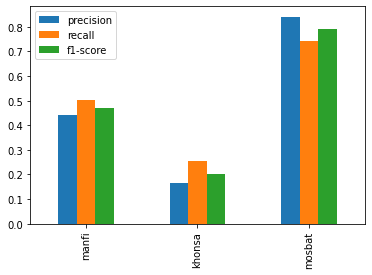

In [ ]:
import sklearn
from IPython import display
import matplotlib.pyplot as plt
predicted=newmodel.predict(test_data)
target =  ['manfi', 'khonsa', 'mosbat']  
report1 =sklearn.metrics.classification_report(labels_test, predicted.round(),target_names=target, digits=4,  output_dict=True)
display.display(pd.DataFrame(report1))
df = pd.DataFrame(report1)
df.iloc[:3, :3].T.plot(kind='bar')
plt.show()


[[[4210    0]
  [   0    0]]

 [[2535  670]
  [ 481  524]]

 [[3571  360]
  [ 208   71]]]


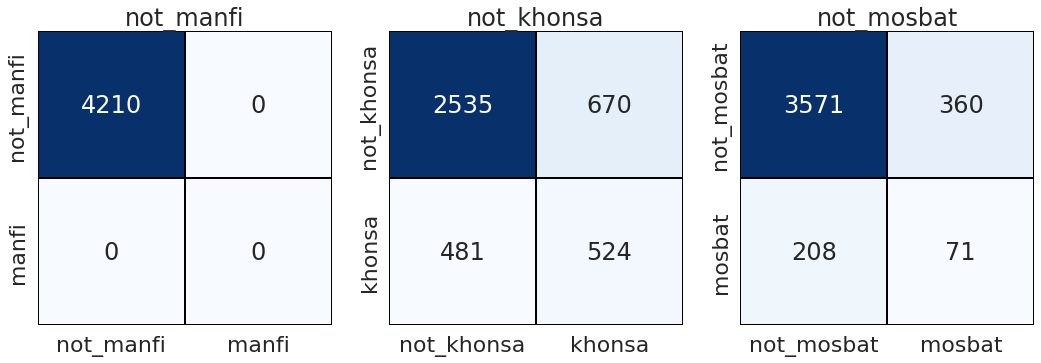

In [ ]:
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = np.argmax(predicted.round(), axis=1)
cm=multilabel_confusion_matrix(test_labels, y_pred, labels=[-1,  0,  1] )
print(cm)

#############
# Plot confusion matrix 
fig = plt.figure(figsize = (15, 10))
for i, (label, matrix) in enumerate(zip(['manfi','khonsa','mosbat'], cm)):
    plt.subplot(f'23{i+1}')
    labels = [f'not_{label}', label]
    sns.heatmap(matrix, annot = True, square = True, fmt = 'd', cbar = False, cmap = 'Blues', 
                xticklabels = labels, yticklabels = labels, linecolor = 'black', linewidth = 1)
    plt.title(labels[0])

plt.tight_layout()
plt.show()




In [ ]:
k = 909
print(test.iloc[k])
x = newmodel(test_data[k:k+1,:])
x
labels = ['manfi', 'khonsa', 'mosbat']  
print(x, labels[np.argmax(x)])


sent                 -1.0
text    عالی فقط یکم سخته
Name: 16011, dtype: object
tf.Tensor([[3.1065833e-06 3.1586194e-09 9.9999690e-01]], shape=(1, 3), dtype=float32) mosbat
